In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Buat direktori jika belum ada
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)


In [ ]:
# Save the dataframe to a CSV file
data.to_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100
3/3 [==============================] - 2s 80ms/step - loss: 0.6541 - val_loss: 0.2805 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4027 - val_loss: 0.1272 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2653 - val_loss: 0.0632 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2050 - val_loss: 0.0606 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1981 - val_loss: 0.0757 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2060 - val_loss: 0.0843 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1881 - val_loss: 0.0774 - lr: 0.0010
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1982 - val_loss: 0.0657 - lr: 0.0010
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2425 - val_loss: 0.0582 - lr: 0.0010
E

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

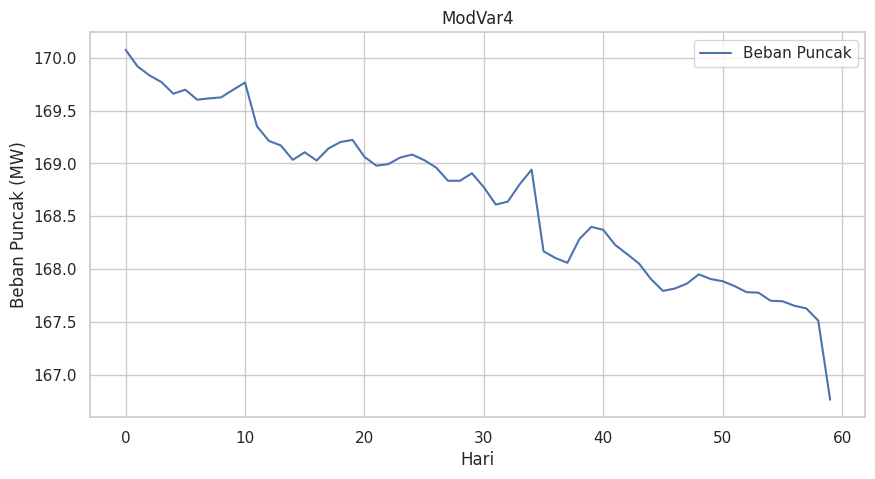

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 536.0410 - mae: 21.0035 - val_loss: 548.7053 - val_mae: 20.1412
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 518.9125 - mae: 20.6098 - val_loss: 533.8431 - val_mae: 19.7572
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 502.7573 - mae: 20.1909 - val_loss: 519.3309 - val_mae: 19.3780
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 489.4258 - mae: 19.8952 - val_loss: 505.5952 - val_mae: 19.0101
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 480.5481 - mae: 19.6053 - val_loss: 492.4696 - val_mae: 18.6477
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 460.8817 - mae: 19.1237 - val_loss: 479.5403 - val_mae: 18.2837
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 454.8344 - mae: 18.9458 - val_loss: 466.5620 - val_mae: 17.9124
Epoch 8/100
4/4 [==============================]

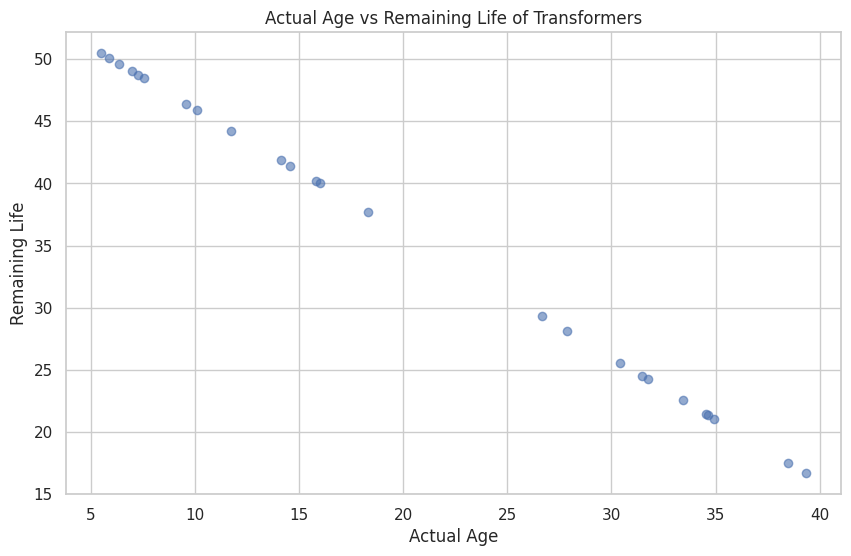

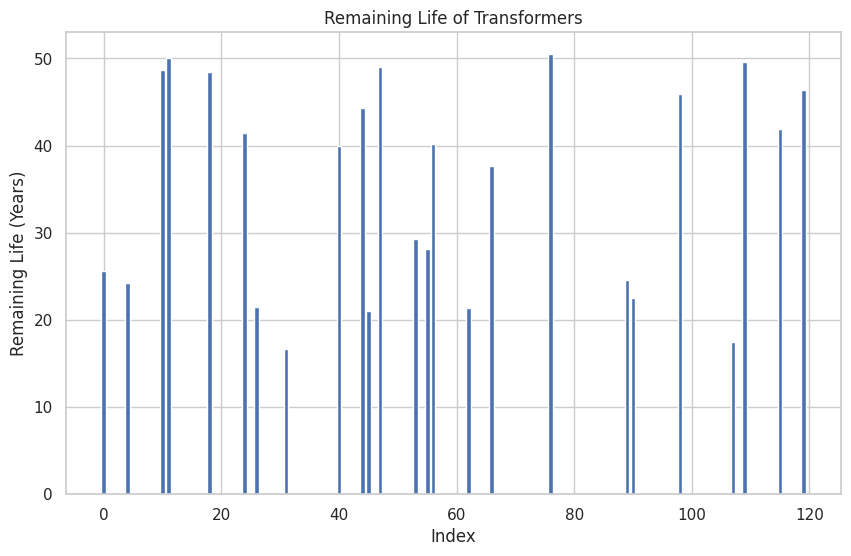

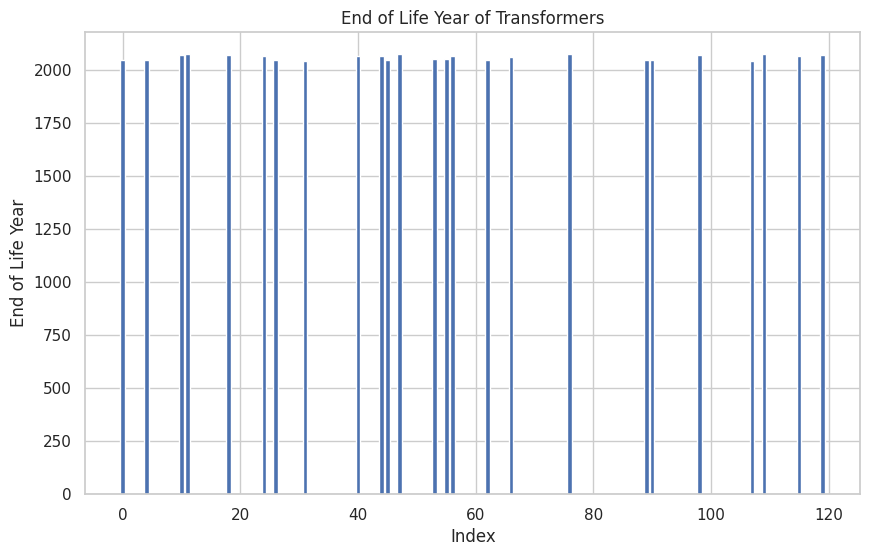

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from google.colab import drive
from google.colab import files
import os

# Bagian 1: Prediksi Beban Puncak
# Membaca data dari spreadsheet
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Membuat kolom baru untuk target peramalan
data['Target1'] = data['Beban Puncak'].shift(-1)
data.dropna(inplace=True)

# Memisahkan data menjadi input features dan target peramalan
X = data[['Beban Puncak', 'Beban Terendah', 'Populasi', 'Energi Produksi MWh']]
y_pred1 = data['Target1']

# Scaling target peramalan menggunakan MinMaxScaler
scaler_target = MinMaxScaler()
y_pred1_scaled = scaler_target.fit_transform(y_pred1.values.reshape(-1, 1))

# Scaling input features menggunakan MinMaxScaler
scaler_input = MinMaxScaler()
X_scaled = scaler_input.fit_transform(X)

# Memisahkan data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred1_scaled, test_size=0.3, random_state=0)

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define dropout rate
dropout_rate = 0.2

# Membuat model ANN dengan Dropout layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1)
])

# Compile model dengan learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train model dengan callbacks EarlyStopping dan LearningRateScheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, LearningRateScheduler(scheduler)])

# Evaluate model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)
print('Error MSE: {:.2f}'.format(mse))

# Make predictions
y_pred1_hat = model.predict(X_scaled)
y_pred1_unscaled = scaler_target.inverse_transform(y_pred1_hat)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_pred1.values, y_pred1_unscaled.flatten())
print('MAPE:', mape)
print('Error MAPE:', mape, '%')

data['Target1'] = y_pred1_unscaled
forecast = pd.DataFrame({'Target1': y_pred1_unscaled.flatten()})
data['Output'] = data['Target1'].shift(-1)

# Mount Google Drive
drive.mount('/content/drive')

# Buat direktori jika belum ada
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)

# Save the dataframe to a CSV file
data.to_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', index=False)

# Download the file
files.download('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv')

# Buat tampilan grafik dari file csv tersebut dengan yang diambil adalah Load Flow, dan Prediction
df = pd.read_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', skiprows=range(1, len(data) - 60))

plt.figure(figsize=(10, 5))
plt.plot(df['Output'], label='Beban Puncak')
plt.xlabel('Hari')
plt.ylabel('Beban Puncak (MW)')
plt.title('ModVar4')  # Adding title to the plot
plt.legend()
plt.show()

# Bagian 2: ANN untuk Peramalan Usia Transformator
# Baca data transformator dari file CSV
transformer_data = pd.read_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv')

# Pisahkan fitur dan target
X_transformer = transformer_data.drop('Transformer Age', axis=1)
y_transformer = transformer_data['Transformer Age']

# Encode non-numeric columns
X_transformer = pd.get_dummies(X_transformer)

# Pisahkan data menjadi training dan testing sets
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_transformer, y_transformer, test_size=0.2, random_state=42)

# Scaling data
scaler_trans = StandardScaler()
X_train_trans = scaler_trans.fit_transform(X_train_trans)
X_test_trans = scaler_trans.transform(X_test_trans)

# Buat model ANN untuk peramalan usia transformator
model_trans = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_trans.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile model
model_trans.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping_trans = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history_trans = model_trans.fit(X_train_trans, y_train_trans, validation_data=(X_test_trans, y_test_trans), epochs=100, batch_size=32, callbacks=[early_stopping_trans])

# Evaluate model
loss_trans, mae_trans = model_trans.evaluate(X_test_trans, y_test_trans)
print(f'Mean Absolute Error on Test Set: {mae_trans}')

# Tambahkan variabel usia maksimum operasional transformator
max_age = 56

# Buat tabel hasil prediksi dan usia aktual serta sisa usia
result_df = pd.DataFrame({
    'Actual Age': y_test_trans
})

# Hitung sisa usia
result_df['Remaining Life'] = max_age - result_df['Actual Age']

# Tambahkan kolom untuk tahun terakhir berfungsi
current_year = 2024
result_df['End of Life Year'] = current_year + result_df['Remaining Life'].astype(int)

# Batasi End of Life Year hingga 2080
result_df['End of Life Year'] = result_df['End of Life Year'].apply(lambda x: min(x, 2080))

# Tampilkan tabel hasil prediksi
print(result_df)

# Tampilkan hasil grafik perbandingan usia transformator aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual Age'], result_df['Remaining Life'], alpha=0.6)
plt.xlabel('Actual Age')
plt.ylabel('Remaining Life')
plt.title('Actual Age vs Remaining Life of Transformers')
plt.show()

# Tampilkan hasil grafik sisa usia transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['Remaining Life'])
plt.xlabel('Index')
plt.ylabel('Remaining Life (Years)')
plt.title('Remaining Life of Transformers')
plt.show()

# Tampilkan hasil grafik tahun terakhir berfungsi transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['End of Life Year'])
plt.xlabel('Index')
plt.ylabel('End of Life Year')
plt.title('End of Life Year of Transformers')
plt.show()

# Save the result dataframe to a CSV file
result_df.to_csv('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv', index=False)
files.download('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv')


In [ ]:
import pandas as pd

# Langkah 1: Unduh dan Baca Data Asli
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Langkah 2: Buat Data Transformator
# Asumsi kita menambahkan beberapa kolom untuk transformator seperti 'Load', 'Operating Temperature', 'Oil Quality', dan 'Age'

# Tambahkan kolom 'Load' (misalnya, nilai acak dalam kisaran 50-100 MW)
data['Load'] = np.random.uniform(50, 100, len(data))

# Tambahkan kolom 'Operating Temperature' (misalnya, nilai acak dalam kisaran 50-80 derajat Celsius)
data['Operating Temperature'] = np.random.uniform(50, 80, len(data))

# Tambahkan kolom 'Oil Quality' (misalnya, nilai acak dalam kisaran 0.5-1.0 untuk mencerminkan kualitas)
data['Oil Quality'] = np.random.uniform(0.5, 1.0, len(data))

# Tambahkan kolom 'Transformer Age' (misalnya, nilai acak dalam kisaran 5-40 tahun)
data['Transformer Age'] = np.random.uniform(5, 40, len(data))

# Pilih kolom yang relevan untuk dataset transformator
transformer_data = data[['Load', 'Operating Temperature', 'Oil Quality', 'Transformer Age']]

# Langkah 3: Simpan Data ke CSV
transformer_data.to_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv', index=False)

# Tampilkan beberapa baris dari dataset baru
print(transformer_data.head())


        Load  Operating Temperature  Oil Quality  Transformer Age
0  50.768271              50.926321     0.924962        29.335749
1  80.109379              76.894282     0.746442        39.642395
2  99.883893              73.998519     0.584232         5.638986
3  77.206839              53.601305     0.638259        14.715428
4  62.417619              76.132486     0.749502        20.652488


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# Hubungkan Google Drive
drive.mount('/content/drive')

# Langkah 1: Unduh dan Baca Data Asli
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Langkah 2: Buat Data Transformator
# Asumsi kita menambahkan beberapa kolom untuk transformator seperti 'Load', 'Operating Temperature', 'Oil Quality', dan 'Age'

# Tambahkan kolom 'Load' (misalnya, nilai acak dalam kisaran 50-100 MW)
data['Load'] = np.random.uniform(50, 100, len(data))

# Tambahkan kolom 'Operating Temperature' (misalnya, nilai acak dalam kisaran 50-80 derajat Celsius)
data['Operating Temperature'] = np.random.uniform(50, 80, len(data))

# Tambahkan kolom 'Oil Quality' (misalnya, nilai acak dalam kisaran 0.5-1.0 untuk mencerminkan kualitas)
data['Oil Quality'] = np.random.uniform(0.5, 1.0, len(data))

# Tambahkan kolom 'Transformer Age' (misalnya, nilai acak dalam kisaran 5-40 tahun)
data['Transformer Age'] = np.random.uniform(5, 40, len(data))

# Daftar nama trafo
transformer_names = [
    'Trafo Tegalsari', 'Trafo Mijen', 'Trafo Gunungpati', 'Trafo Banyumanik', 'Trafo Pedurungan',
    'Trafo Genuk', 'Trafo Semarang Barat', 'Trafo Semarang Timur', 'Trafo Gayamsari', 'Trafo Tugu',
    'Trafo Tembalang', 'Trafo Srondol', 'Trafo Kaligawe', 'Trafo Marina', 'Trafo Mangunharjo',
    'Trafo Jatingaleh', 'Trafo Johar', 'Trafo Krapyak', 'Trafo Bangetayu', 'Trafo Karangayu',
    'Trafo Plamongan', 'Trafo Banjirkanal Barat', 'Trafo Banjirkanal Timur', 'Trafo Kota Lama', 'Trafo Tanah Mas'
]

# Jika jumlah nama trafo kurang dari jumlah baris data, ulangi nama-nama trafo
transformer_names = transformer_names * (len(data) // len(transformer_names)) + transformer_names[:len(data) % len(transformer_names)]

# Tambahkan kolom 'Transformer Name'
data['Transformer Name'] = transformer_names

# Pilih kolom yang relevan untuk dataset transformator
transformer_data = data[['Transformer Name', 'Load', 'Operating Temperature', 'Oil Quality', 'Transformer Age']]

# Langkah 3: Buat Direktori dan Simpan Data ke CSV
import os
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)
transformer_data.to_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv', index=False)

# Tampilkan beberapa baris dari dataset baru
print(transformer_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Transformer Name       Load  Operating Temperature  Oil Quality  \
0   Trafo Tegalsari  52.766954              62.597752     0.730278   
1       Trafo Mijen  93.304560              51.416199     0.641580   
2  Trafo Gunungpati  67.386518              62.752813     0.525726   
3  Trafo Banyumanik  82.789878              64.689901     0.945736   
4  Trafo Pedurungan  84.996545              67.521193     0.696072   

   Transformer Age  
0        30.416240  
1        32.962311  
2        28.862598  
3        23.897592  
4        31.734379  


Epoch 1/100
3/3 [==============================] - 5s 415ms/step - loss: 3.1121 - val_loss: 2.2462 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 89ms/step - loss: 2.2086 - val_loss: 1.6257 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 72ms/step - loss: 1.6973 - val_loss: 1.1274 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 64ms/step - loss: 1.1224 - val_loss: 0.7487 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 99ms/step - loss: 0.8555 - val_loss: 0.4742 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 0.6125 - val_loss: 0.2837 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 66ms/step - loss: 0.4888 - val_loss: 0.1617 - lr: 0.0010
Epoch 8/100
3/3 [==============================] - 0s 87ms/step - loss: 0.3873 - val_loss: 0.0921 - lr: 0.0010
Epoch 9/100
3/3 [==============================] - 0s 91ms/step - loss: 0.2317 - val_loss: 0.0612 - lr: 0.0010


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

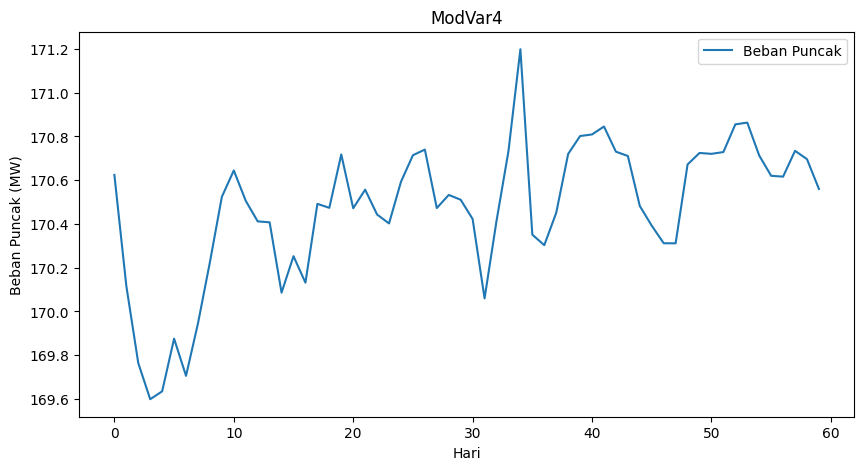

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 524.6302 - mae: 20.7167 - val_loss: 545.6856 - val_mae: 20.1624
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 515.4661 - mae: 20.5019 - val_loss: 538.2740 - val_mae: 19.9785
Epoch 3/100
4/4 [==============================] - 0s 34ms/step - loss: 509.9448 - mae: 20.3600 - val_loss: 531.4340 - val_mae: 19.8064
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 505.4440 - mae: 20.2400 - val_loss: 525.0632 - val_mae: 19.6438
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 499.4498 - mae: 20.0664 - val_loss: 519.1406 - val_mae: 19.4892
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 490.4469 - mae: 19.8680 - val_loss: 513.2836 - val_mae: 19.3350
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 484.7790 - mae: 19.7017 - val_loss: 507.2414 - val_mae: 19.1747
Epoch 8/100
4/4 [==============================]

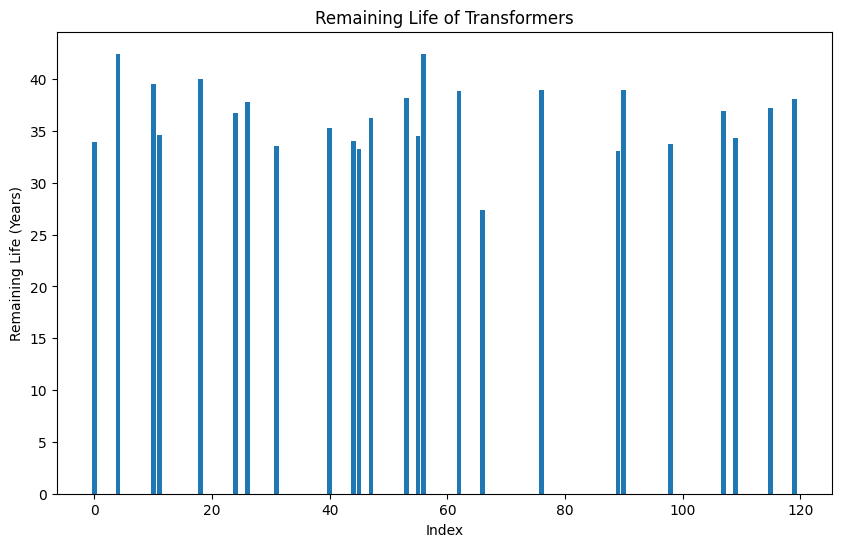

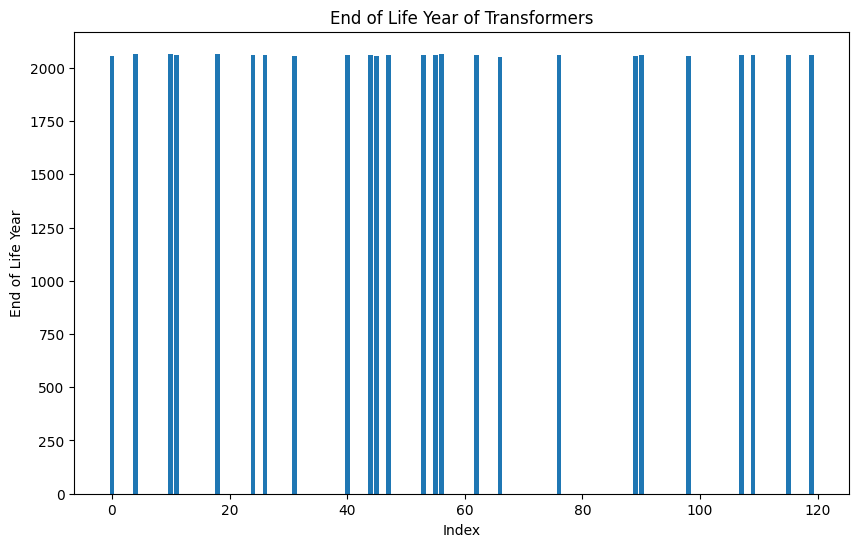

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error

# Bagian 1: Prediksi Beban Puncak
# Membaca data dari spreadsheet
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Membuat kolom baru untuk target peramalan
data['Target1'] = data['Beban Puncak'].shift(-1)
data.dropna(inplace=True)

# Memisahkan data menjadi input features dan target peramalan
X = data[['Beban Puncak', 'Beban Terendah', 'Populasi', 'Energi Produksi MWh']]
y_pred1 = data['Target1']

# Scaling target peramalan menggunakan MinMaxScaler
scaler_target = MinMaxScaler()
y_pred1_scaled = scaler_target.fit_transform(y_pred1.values.reshape(-1, 1))

# Scaling input features menggunakan MinMaxScaler
scaler_input = MinMaxScaler()
X_scaled = scaler_input.fit_transform(X)

# Memisahkan data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred1_scaled, test_size=0.3, random_state=0)

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define dropout rate
dropout_rate = 0.2

# Membuat model ANN dengan Dropout layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1)
])

# Compile model dengan learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train model dengan callbacks EarlyStopping dan LearningRateScheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, LearningRateScheduler(scheduler)])

# Evaluate model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)
print('Error MSE: {:.2f}'.format(mse))

# Make predictions
y_pred1_hat = model.predict(X_scaled)
y_pred1_unscaled = scaler_target.inverse_transform(y_pred1_hat)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_pred1.values, y_pred1_unscaled.flatten())
print('MAPE:', mape)
print('Error MAPE:', mape, '%')

data['Target1'] = y_pred1_unscaled
forecast = pd.DataFrame({'Target1': y_pred1_unscaled.flatten()})
data['Output'] = data['Target1'].shift(-1)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Buat direktori jika belum ada
import os
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)

# Save the dataframe to a CSV file
data.to_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv')

# Buat tampilan grafik dari file csv tersebut dengan yang diambil adalah Load Flow, dan Prediction
df = pd.read_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', skiprows=range(1, len(data) - 60))

plt.figure(figsize=(10, 5))
plt.plot(df['Output'], label='Beban Puncak')
plt.xlabel('Hari')
plt.ylabel('Beban Puncak (MW)')
plt.title('ModVar4')  # Adding title to the plot
plt.legend()
plt.show()

# Bagian 2: ANN untuk Peramalan Usia Transformator
# Baca data transformator dari file CSV
transformer_data = pd.read_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv')

# Pisahkan fitur dan target, termasuk kolom nama transformator
X_transformer = transformer_data.drop(['Transformer Age', 'Transformer Name'], axis=1)
y_transformer = transformer_data['Transformer Age']
transformer_names = transformer_data['Transformer Name']

# Pisahkan data menjadi training dan testing sets
X_train_trans, X_test_trans, y_train_trans, y_test_trans, train_names, test_names = train_test_split(X_transformer, y_transformer, transformer_names, test_size=0.2, random_state=42)

# Scaling data
scaler_trans = StandardScaler()
X_train_trans = scaler_trans.fit_transform(X_train_trans)
X_test_trans = scaler_trans.transform(X_test_trans)

# Buat model ANN untuk peramalan usia transformator
model_trans = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_trans.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile model
model_trans.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping_trans = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history_trans = model_trans.fit(X_train_trans, y_train_trans, validation_data=(X_test_trans, y_test_trans), epochs=100, batch_size=32, callbacks=[early_stopping_trans])

# Evaluate model
loss_trans, mae_trans = model_trans.evaluate(X_test_trans, y_test_trans)
print(f'Mean Absolute Error on Test Set: {mae_trans}')

# Make predictions
y_pred_trans = model_trans.predict(X_test_trans)

# Tambahkan variabel usia maksimum operasional transformator
max_age = 56

# Buat tabel hasil prediksi dan usia aktual serta sisa usia
result_df = pd.DataFrame({
    'Transformer Name': test_names,
    'Actual Age': y_test_trans,
    'Predicted Age': y_pred_trans.flatten()
})

# Hitung sisa usia
result_df['Remaining Life'] = max_age - result_df['Predicted Age']

# Tambahkan kolom untuk tahun terakhir berfungsi
current_year = 2024
result_df['End of Life Year'] = current_year + result_df['Remaining Life'].astype(int)

# Batasi End of Life Year hingga 2080
result_df['End of Life Year'] = result_df['End of Life Year'].apply(lambda x: min(x, 2080))

# Tampilkan tabel hasil prediksi
print(result_df)

# Tampilkan hasil grafik sisa usia transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['Remaining Life'])
plt.xlabel('Index')
plt.ylabel('Remaining Life (Years)')
plt.title('Remaining Life of Transformers')
plt.show()

# Tampilkan hasil grafik tahun terakhir berfungsi transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['End of Life Year'])
plt.xlabel('Index')
plt.ylabel('End of Life Year')
plt.title('End of Life Year of Transformers')
plt.show()

# Save the result dataframe to a CSV file
result_df.to_csv('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv', index=False)
files.download('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv')


In [ ]:
# Install necessary libraries
!pip install matplotlib pandas seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define the data
data = {
    "Actual Age": [18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10, 90, 109, 11, 76, 56, 115, 0, 26, 44, 66, 98, 24],
    "Predicted Age": [27.105199, 8.749889, 32.633827, 7.621234, 28.616426, 17.534500, 29.514350, 36.230373, 15.038149, 10.012156, 16.755305, 11.234714, 37.120636, 31.956576, 24.780006, 31.943287, 6.824345, 23.088016, 22.480887, 7.670781, 31.267563, 39.505794, 5.447104, 18.789141, 31.303108],
    "Remaining Life": [28.118502, 28.850277, 28.144497, 23.239235, 19.611835, 15.578907, 19.060095, 16.531940, 19.894323, 16.446609, 22.317270, 23.410566, 22.704432, 19.264488, 21.177374, 27.064766, 23.662756, 22.087831, 19.947037, 22.563457, 20.311113, 17.651241, 18.284227, 21.660536, 24.960531],
    "End of Life Year": [2051, 2051, 2051, 2056, 2060, 2064, 2060, 2063, 2060, 2063, 2057, 2056, 2057, 2060, 2058, 2052, 2056, 2057, 2060, 2057, 2059, 2062, 2061, 2058, 2055]
}

# Create DataFrame
df = pd.DataFrame(data)


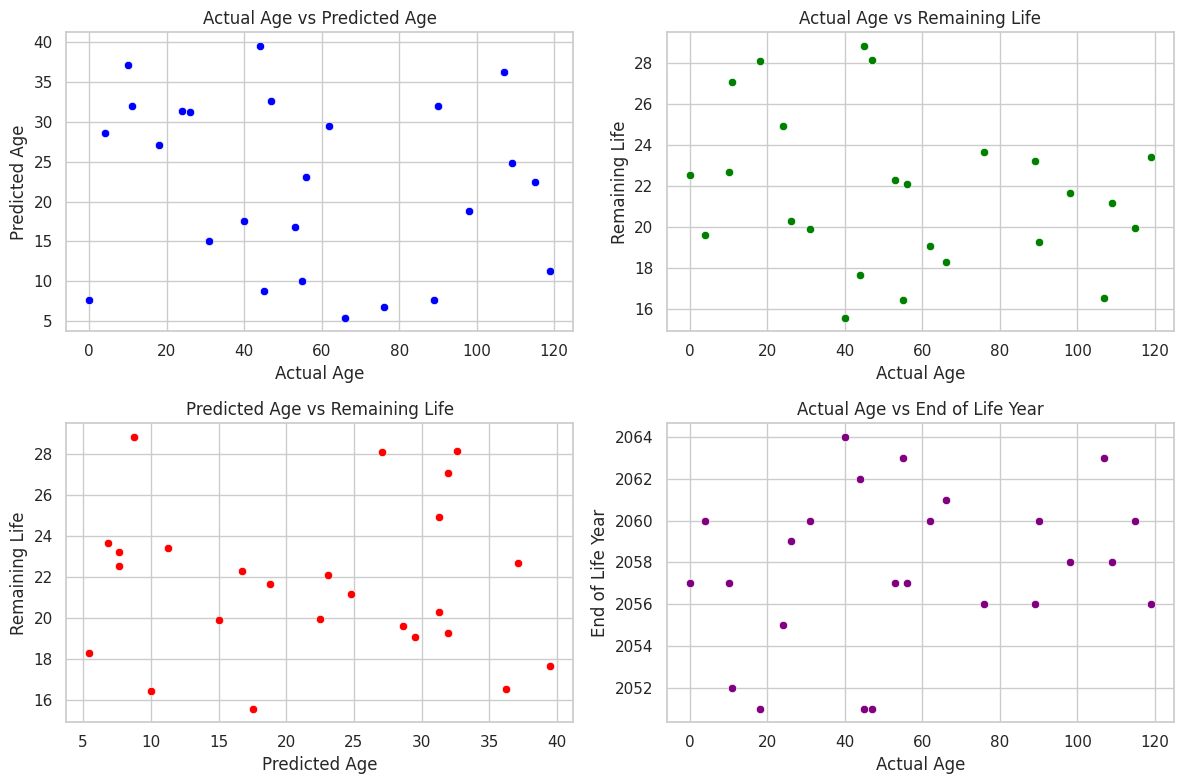

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot Actual Age vs Predicted Age
plt.subplot(2, 2, 1)
sns.scatterplot(x='Actual Age', y='Predicted Age', data=df, color='blue')
plt.title('Actual Age vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

# Plot Remaining Life vs Actual Age
plt.subplot(2, 2, 2)
sns.scatterplot(x='Actual Age', y='Remaining Life', data=df, color='green')
plt.title('Actual Age vs Remaining Life')
plt.xlabel('Actual Age')
plt.ylabel('Remaining Life')

# Plot Remaining Life vs Predicted Age
plt.subplot(2, 2, 3)
sns.scatterplot(x='Predicted Age', y='Remaining Life', data=df, color='red')
plt.title('Predicted Age vs Remaining Life')
plt.xlabel('Predicted Age')
plt.ylabel('Remaining Life')

# Plot End of Life Year vs Actual Age
plt.subplot(2, 2, 4)
sns.scatterplot(x='Actual Age', y='End of Life Year', data=df, color='purple')
plt.title('Actual Age vs End of Life Year')
plt.xlabel('Actual Age')
plt.ylabel('End of Life Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Epoch 1/100
3/3 [==============================] - 1s 89ms/step - loss: 0.1561 - val_loss: 0.0661 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1519 - val_loss: 0.0585 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1289 - val_loss: 0.0551 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1237 - val_loss: 0.0579 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1641 - val_loss: 0.0590 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1459 - val_loss: 0.0565 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1713 - val_loss: 0.0555 - lr: 0.0010
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1155 - val_loss: 0.0555 - lr: 0.0010
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1008 - val_loss: 0.0563 - lr: 0.0010
E

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

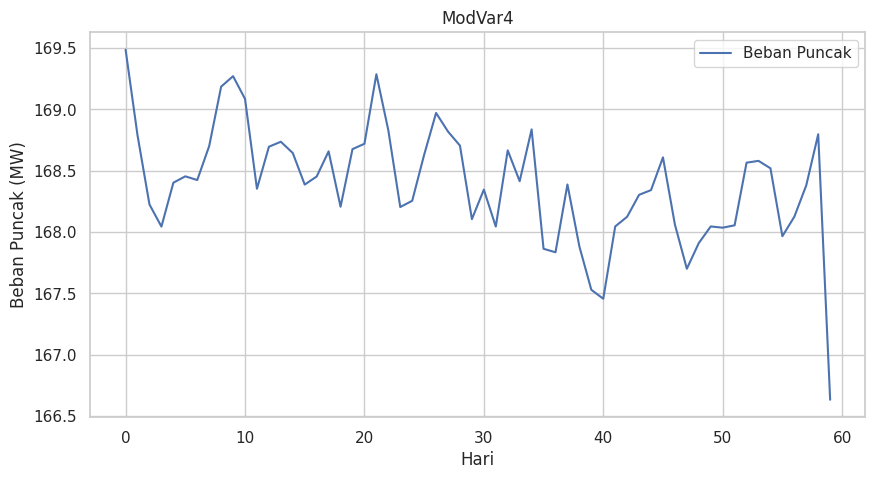

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 535.7693 - mae: 20.9899 - val_loss: 559.6676 - val_mae: 20.5189
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 530.8650 - mae: 20.8455 - val_loss: 554.9976 - val_mae: 20.3994
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 527.9279 - mae: 20.7809 - val_loss: 550.6164 - val_mae: 20.2870
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 520.0031 - mae: 20.6025 - val_loss: 546.4417 - val_mae: 20.1786
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 515.7181 - mae: 20.4987 - val_loss: 542.3068 - val_mae: 20.0705
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 510.6516 - mae: 20.3938 - val_loss: 538.0819 - val_mae: 19.9601
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 507.0168 - mae: 20.2771 - val_loss: 533.7049 - val_mae: 19.8468
Epoch 8/100
4/4 [==============================]

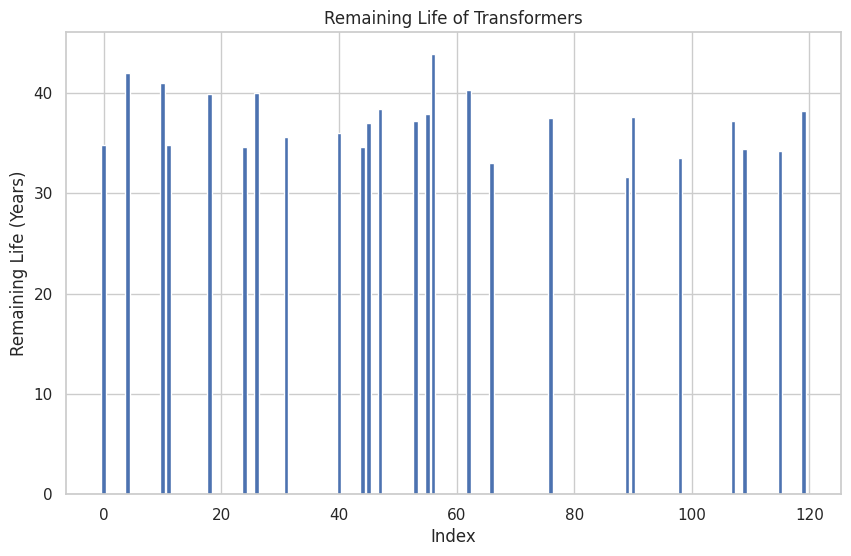

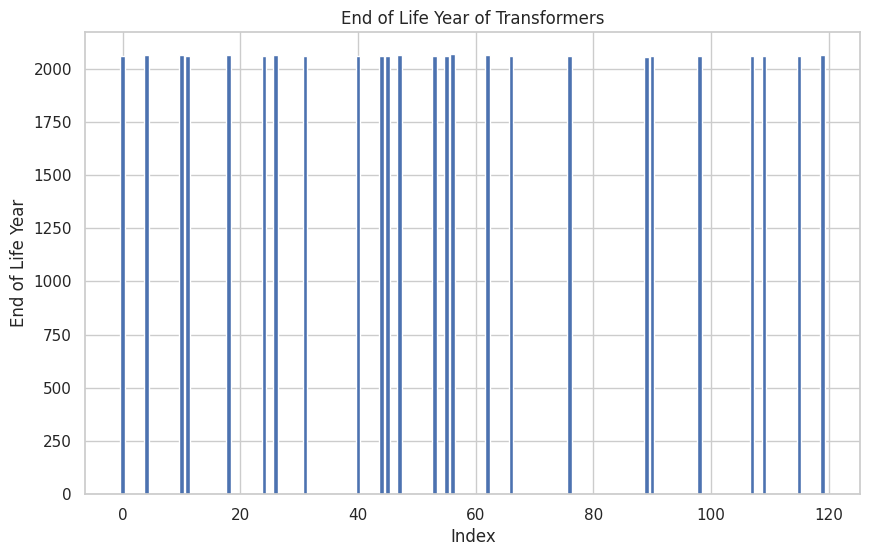

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from google.colab import drive
from google.colab import files
import os

# Bagian 1: Prediksi Beban Puncak
# Membaca data dari spreadsheet
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Membuat kolom baru untuk target peramalan
data['Target1'] = data['Beban Puncak'].shift(-1)
data.dropna(inplace=True)

# Memisahkan data menjadi input features dan target peramalan
X = data[['Beban Puncak', 'Beban Terendah', 'Populasi', 'Energi Produksi MWh']]
y_pred1 = data['Target1']

# Scaling target peramalan menggunakan MinMaxScaler
scaler_target = MinMaxScaler()
y_pred1_scaled = scaler_target.fit_transform(y_pred1.values.reshape(-1, 1))

# Scaling input features menggunakan MinMaxScaler
scaler_input = MinMaxScaler()
X_scaled = scaler_input.fit_transform(X)

# Memisahkan data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred1_scaled, test_size=0.3, random_state=0)

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define dropout rate
dropout_rate = 0.2

# Membuat model ANN dengan Dropout layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1)
])

# Compile model dengan learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train model dengan callbacks EarlyStopping dan LearningRateScheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, LearningRateScheduler(scheduler)])

# Evaluate model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)
print('Error MSE: {:.2f}'.format(mse))

# Make predictions
y_pred1_hat = model.predict(X_scaled)
y_pred1_unscaled = scaler_target.inverse_transform(y_pred1_hat)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_pred1.values, y_pred1_unscaled.flatten())
print('MAPE:', mape)
print('Error MAPE:', mape, '%')

data['Target1'] = y_pred1_unscaled
forecast = pd.DataFrame({'Target1': y_pred1_unscaled.flatten()})
data['Output'] = data['Target1'].shift(-1)

# Mount Google Drive
drive.mount('/content/drive')

# Buat direktori jika belum ada
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)

# Save the dataframe to a CSV file
data.to_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', index=False)

# Download the file
files.download('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv')

# Buat tampilan grafik dari file csv tersebut dengan yang diambil adalah Load Flow, dan Prediction
df = pd.read_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', skiprows=range(1, len(data) - 60))

plt.figure(figsize=(10, 5))
plt.plot(df['Output'], label='Beban Puncak')
plt.xlabel('Hari')
plt.ylabel('Beban Puncak (MW)')
plt.title('ModVar4')  # Adding title to the plot
plt.legend()
plt.show()

# Bagian 2: ANN untuk Peramalan Usia Transformator
# Baca data transformator dari file CSV
transformer_data = pd.read_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv')

# Pisahkan fitur dan target, termasuk kolom nama transformator
X_transformer = transformer_data.drop(['Transformer Age', 'Transformer Name'], axis=1)
y_transformer = transformer_data['Transformer Age']
transformer_names = transformer_data['Transformer Name']

# Pisahkan data menjadi training dan testing sets
X_train_trans, X_test_trans, y_train_trans, y_test_trans, train_names, test_names = train_test_split(
    X_transformer, y_transformer, transformer_names, test_size=0.2, random_state=42
)

# Scaling data
scaler_trans = StandardScaler()
X_train_trans = scaler_trans.fit_transform(X_train_trans)
X_test_trans = scaler_trans.transform(X_test_trans)

# Buat model ANN untuk peramalan usia transformator
model_trans = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_trans.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile model
model_trans.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping_trans = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history_trans = model_trans.fit(X_train_trans, y_train_trans, validation_data=(X_test_trans, y_test_trans), epochs=100, batch_size=32, callbacks=[early_stopping_trans])

# Evaluate model
loss_trans, mae_trans = model_trans.evaluate(X_test_trans, y_test_trans)
print(f'Mean Absolute Error on Test Set: {mae_trans}')

# Make predictions
y_pred_trans = model_trans.predict(X_test_trans)

# Tambahkan variabel usia maksimum operasional transformator
max_age = 56

# Buat tabel hasil prediksi dan usia aktual serta sisa usia
result_df = pd.DataFrame({
    'Transformer Name': test_names,
    'Actual Age': y_test_trans,
    'Predicted Age': y_pred_trans.flatten()
})

# Hitung sisa usia
result_df['Remaining Life'] = max_age - result_df['Predicted Age']

# Tambahkan kolom untuk tahun terakhir berfungsi
current_year = 2024
result_df['End of Life Year'] = current_year + result_df['Remaining Life'].astype(int)

# Batasi End of Life Year hingga 2080
result_df['End of Life Year'] = result_df['End of Life Year'].apply(lambda x: min(x, 2080))

# Tampilkan tabel hasil prediksi
print(result_df)

# Tampilkan hasil grafik sisa usia transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['Remaining Life'])
plt.xlabel('Index')
plt.ylabel('Remaining Life (Years)')
plt.title('Remaining Life of Transformers')
plt.show()

# Tampilkan hasil grafik tahun terakhir berfungsi transformator
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['End of Life Year'])
plt.xlabel('Index')
plt.ylabel('End of Life Year')
plt.title('End of Life Year of Transformers')
plt.show()

# Save the result dataframe to a CSV file
result_df.to_csv('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv', index=False)
files.download('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv')


Epoch 1/100
3/3 [==============================] - 2s 205ms/step - loss: 0.2473 - val_loss: 0.0551 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 58ms/step - loss: 0.1709 - val_loss: 0.0636 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.2253 - val_loss: 0.0881 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 76ms/step - loss: 0.2147 - val_loss: 0.0922 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 73ms/step - loss: 0.2187 - val_loss: 0.0720 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1442 - val_loss: 0.0563 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1816 - val_loss: 0.0541 - lr: 0.0010
Epoch 8/100
3/3 [==============================] - 0s 88ms/step - loss: 0.1928 - val_loss: 0.0551 - lr: 0.0010
Epoch 9/100
3/3 [==============================] - 0s 44ms/step - loss: 0.1368 - val_loss: 0.0549 - lr: 0.0010


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

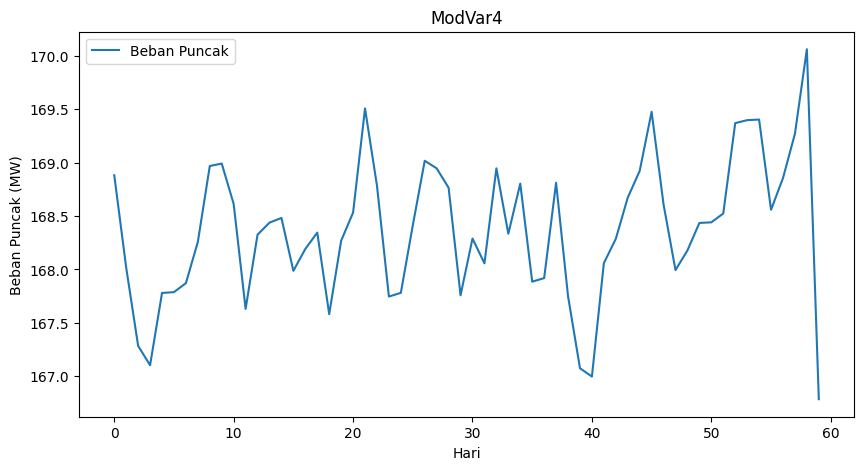

Epoch 1/100
4/4 [==============================] - 1s 101ms/step - loss: 530.5388 - mae: 20.8326 - val_loss: 548.8829 - val_mae: 20.2722
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 522.0219 - mae: 20.6390 - val_loss: 543.4334 - val_mae: 20.1367
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 518.4774 - mae: 20.5620 - val_loss: 538.0544 - val_mae: 20.0026
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 511.4835 - mae: 20.3811 - val_loss: 532.5735 - val_mae: 19.8646
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 505.8195 - mae: 20.2493 - val_loss: 526.9383 - val_mae: 19.7212
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 497.1337 - mae: 20.0289 - val_loss: 520.9061 - val_mae: 19.5671
Epoch 7/100
4/4 [==============================] - 0s 32ms/step - loss: 490.2691 - mae: 19.8453 - val_loss: 514.3279 - val_mae: 19.3993
Epoch 8/100
4/4 [==============================

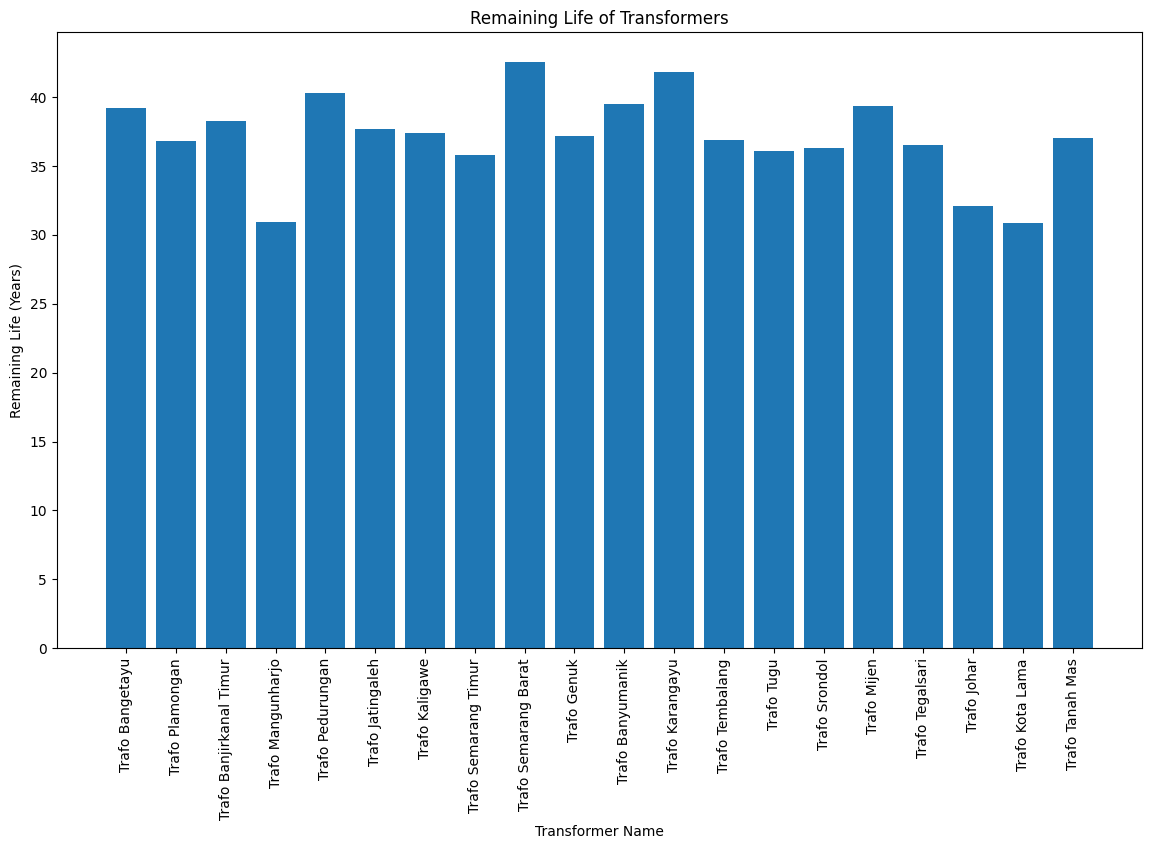

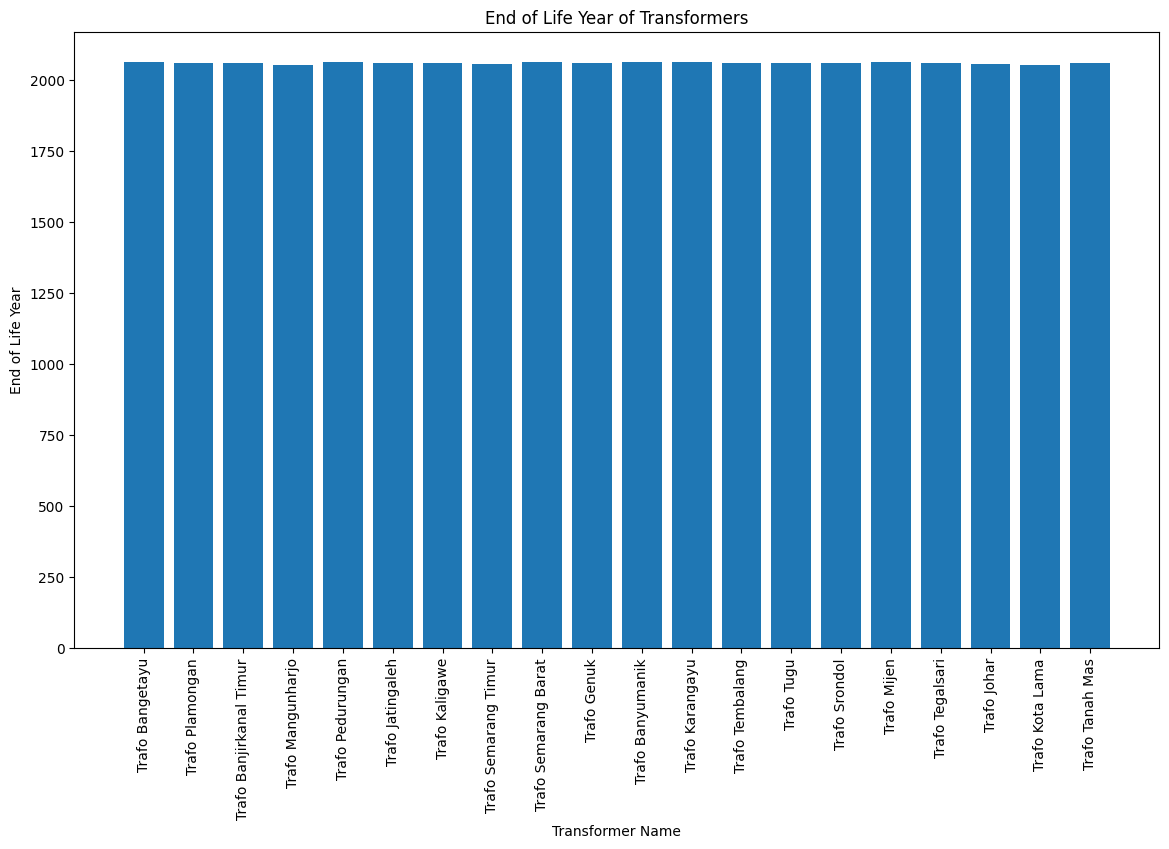

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error

# Bagian 1: Prediksi Beban Puncak
# Membaca data dari spreadsheet
url = 'https://drive.google.com/uc?id=1bAPhVlcerXRjlzT7MhrWtCW8JZl16OIM'
data = pd.read_csv(url)

# Membuat kolom baru untuk target peramalan
data['Target1'] = data['Beban Puncak'].shift(-1)
data.dropna(inplace=True)

# Memisahkan data menjadi input features dan target peramalan
X = data[['Beban Puncak', 'Beban Terendah', 'Populasi', 'Energi Produksi MWh']]
y_pred1 = data['Target1']

# Scaling target peramalan menggunakan MinMaxScaler
scaler_target = MinMaxScaler()
y_pred1_scaled = scaler_target.fit_transform(y_pred1.values.reshape(-1, 1))

# Scaling input features menggunakan MinMaxScaler
scaler_input = MinMaxScaler()
X_scaled = scaler_input.fit_transform(X)

# Memisahkan data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred1_scaled, test_size=0.3, random_state=0)

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define dropout rate
dropout_rate = 0.2

# Membuat model ANN dengan Dropout layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1)
])

# Compile model dengan learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train model dengan callbacks EarlyStopping dan LearningRateScheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, LearningRateScheduler(scheduler)])

# Evaluate model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)
print('Error MSE: {:.2f}'.format(mse))

# Make predictions
y_pred1_hat = model.predict(X_scaled)
y_pred1_unscaled = scaler_target.inverse_transform(y_pred1_hat)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_pred1.values, y_pred1_unscaled.flatten())
print('MAPE:', mape)
print('Error MAPE:', mape, '%')

data['Target1'] = y_pred1_unscaled
forecast = pd.DataFrame({'Target1': y_pred1_unscaled.flatten()})
data['Output'] = data['Target1'].shift(-1)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Buat direktori jika belum ada
import os
os.makedirs('/content/drive/My Drive/Data_tesis', exist_ok=True)

# Save the dataframe to a CSV file
data.to_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv')

# Buat tampilan grafik dari file csv tersebut dengan yang diambil adalah Load Flow, dan Prediction
df = pd.read_csv('/content/drive/My Drive/Data_tesis/Bulan_Beban Puncak.csv', skiprows=range(1, len(data) - 60))

plt.figure(figsize=(10, 5))
plt.plot(df['Output'], label='Beban Puncak')
plt.xlabel('Hari')
plt.ylabel('Beban Puncak (MW)')
plt.title('ModVar4')  # Adding title to the plot
plt.legend()
plt.show()

# Bagian 2: ANN untuk Peramalan Usia Transformator
# Baca data transformator dari file CSV
transformer_data = pd.read_csv('/content/drive/My Drive/Data_tesis/transformer_data.csv')

# Pisahkan fitur dan target, termasuk kolom nama transformator
X_transformer = transformer_data.drop(['Transformer Age', 'Transformer Name'], axis=1)
y_transformer = transformer_data['Transformer Age']
transformer_names = transformer_data['Transformer Name']

# Pisahkan data menjadi training dan testing sets
X_train_trans, X_test_trans, y_train_trans, y_test_trans, train_names, test_names = train_test_split(X_transformer, y_transformer, transformer_names, test_size=0.2, random_state=42)

# Scaling data
scaler_trans = StandardScaler()
X_train_trans = scaler_trans.fit_transform(X_train_trans)
X_test_trans = scaler_trans.transform(X_test_trans)

# Buat model ANN untuk peramalan usia transformator
model_trans = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_trans.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile model
model_trans.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping_trans = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history_trans = model_trans.fit(X_train_trans, y_train_trans, validation_data=(X_test_trans, y_test_trans), epochs=100, batch_size=32, callbacks=[early_stopping_trans])

# Evaluate model
loss_trans, mae_trans = model_trans.evaluate(X_test_trans, y_test_trans)
print(f'Mean Absolute Error on Test Set: {mae_trans}')

# Make predictions
y_pred_trans = model_trans.predict(X_test_trans)

# Tambahkan variabel usia maksimum operasional transformator
max_age = 56

# Buat tabel hasil prediksi dan usia aktual serta sisa usia
result_df = pd.DataFrame({
    'Transformer Name': test_names,
    'Actual Age': y_test_trans,
    'Predicted Age': y_pred_trans.flatten()
})

# Hitung sisa usia
result_df['Remaining Life'] = max_age - result_df['Predicted Age']

# Tambahkan kolom untuk tahun terakhir berfungsi
current_year = 2024
result_df['End of Life Year'] = current_year + result_df['Remaining Life'].astype(int)

# Batasi End of Life Year hingga 2080
result_df['End of Life Year'] = result_df['End of Life Year'].apply(lambda x: min(x, 2080))

# Tampilkan tabel hasil prediksi
print(result_df)

# Tampilkan hasil grafik sisa usia transformator
plt.figure(figsize=(14, 8))
plt.bar(result_df['Transformer Name'], result_df['Remaining Life'])
plt.xlabel('Transformer Name')
plt.ylabel('Remaining Life (Years)')
plt.title('Remaining Life of Transformers')
plt.xticks(rotation=90)
plt.show()

# Tampilkan hasil grafik tahun terakhir berfungsi transformator
plt.figure(figsize=(14, 8))
plt.bar(result_df['Transformer Name'], result_df['End of Life Year'])
plt.xlabel('Transformer Name')
plt.ylabel('End of Life Year')
plt.title('End of Life Year of Transformers')
plt.xticks(rotation=90)
plt.show()

# Save the result dataframe to a CSV file
result_df.to_csv('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv', index=False)
files.download('/content/drive/My Drive/Data_tesis/Transformer_Age_Predictions.csv')


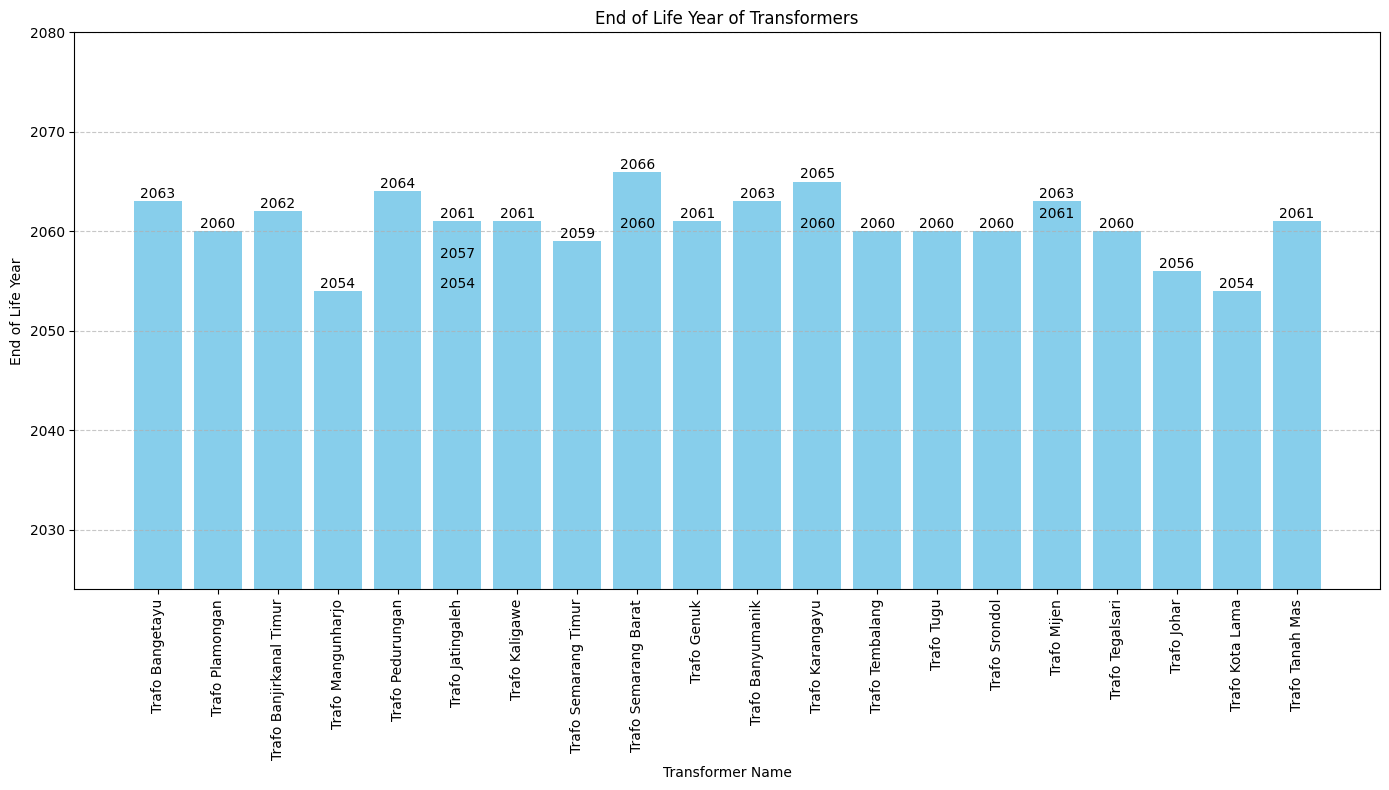

In [ ]:
import matplotlib.pyplot as plt

# Tampilkan hasil grafik tahun terakhir berfungsi transformator dengan anotasi dan gridlines
plt.figure(figsize=(14, 8))
bars = plt.bar(result_df['Transformer Name'], result_df['End of Life Year'], color='skyblue')

# Menambahkan nilai pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom')

# Tambahkan gridlines untuk referensi visual
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis range from 2000 to 2080
plt.ylim(2024, 2080)

plt.xlabel('Transformer Name')
plt.ylabel('End of Life Year')
plt.title('End of Life Year of Transformers')
plt.xticks(rotation=90)
plt.tight_layout()  # Agar semua elemen grafik tidak terpotong
plt.show()


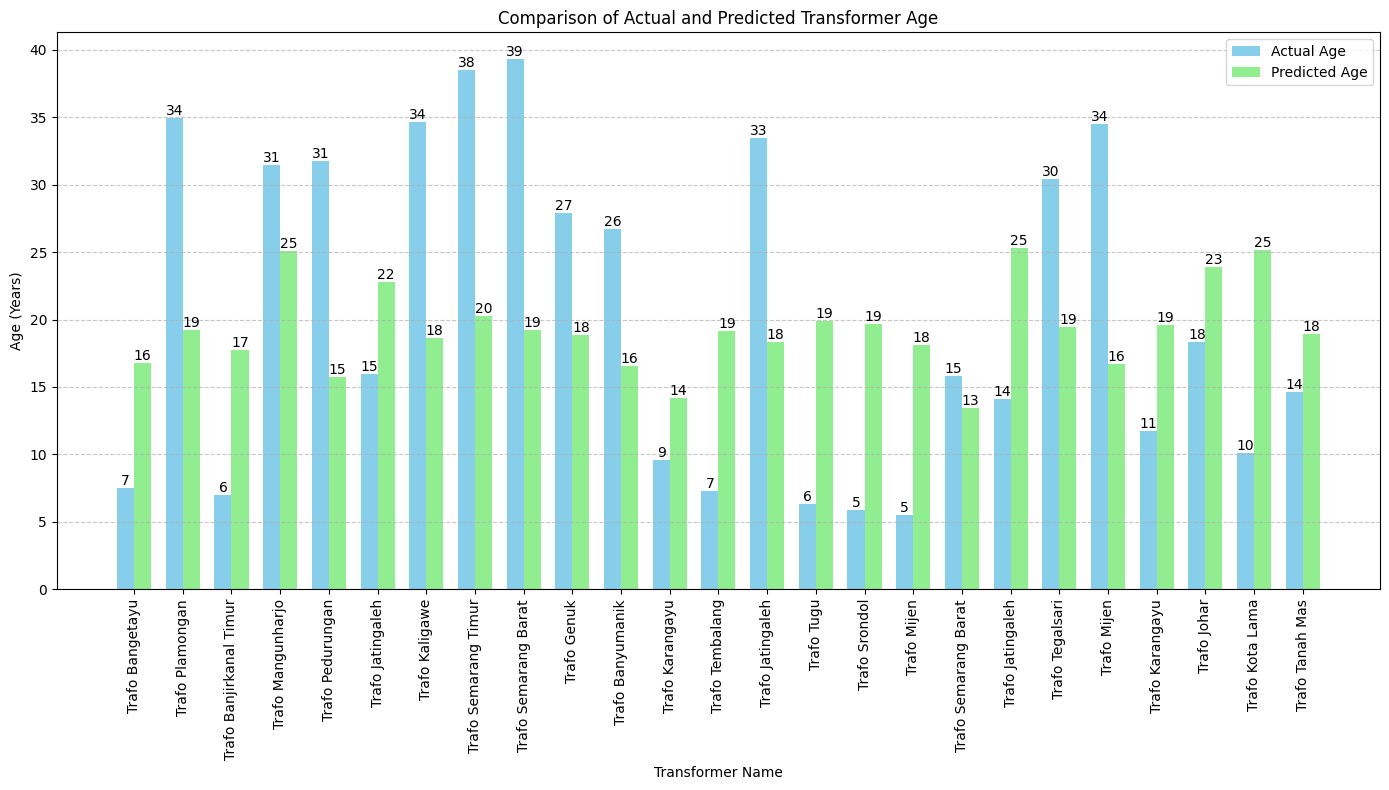

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lebar bar
bar_width = 0.35

# Posisi bar di sumbu x
index = np.arange(len(result_df))

# Membuat grafik bar untuk usia aktual dan usia prediksi
plt.figure(figsize=(14, 8))
actual_age_bars = plt.bar(index, result_df['Actual Age'], bar_width, label='Actual Age', color='skyblue')
predicted_age_bars = plt.bar(index + bar_width, result_df['Predicted Age'], bar_width, label='Predicted Age', color='lightgreen')

# Menambahkan nilai pada setiap batang untuk usia aktual
for bar in actual_age_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

# Menambahkan nilai pada setiap batang untuk usia prediksi
for bar in predicted_age_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

# Tambahkan gridlines untuk referensi visual
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Setel label dan judul
plt.xlabel('Transformer Name')
plt.ylabel('Age (Years)')
plt.title('Comparison of Actual and Predicted Transformer Age')
plt.xticks(index + bar_width / 2, result_df['Transformer Name'], rotation=90)
plt.legend()

# Agar semua elemen grafik tidak terpotong
plt.tight_layout()
plt.show()


Train MSE: 87.23, Train R2: 0.06
Test MSE: 212.34, Test R2: -0.57
                 Feature  Coefficient
0                   Load     0.309353
1  Operating Temperature    -2.315109
2            Oil Quality    -0.249881


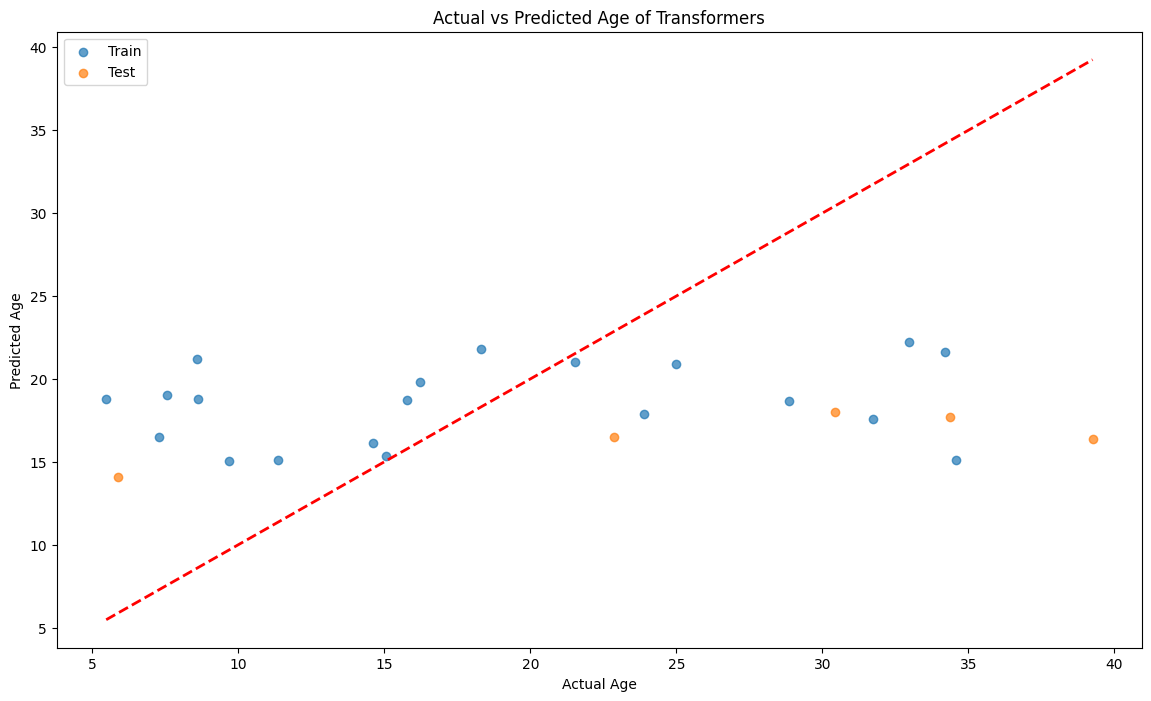

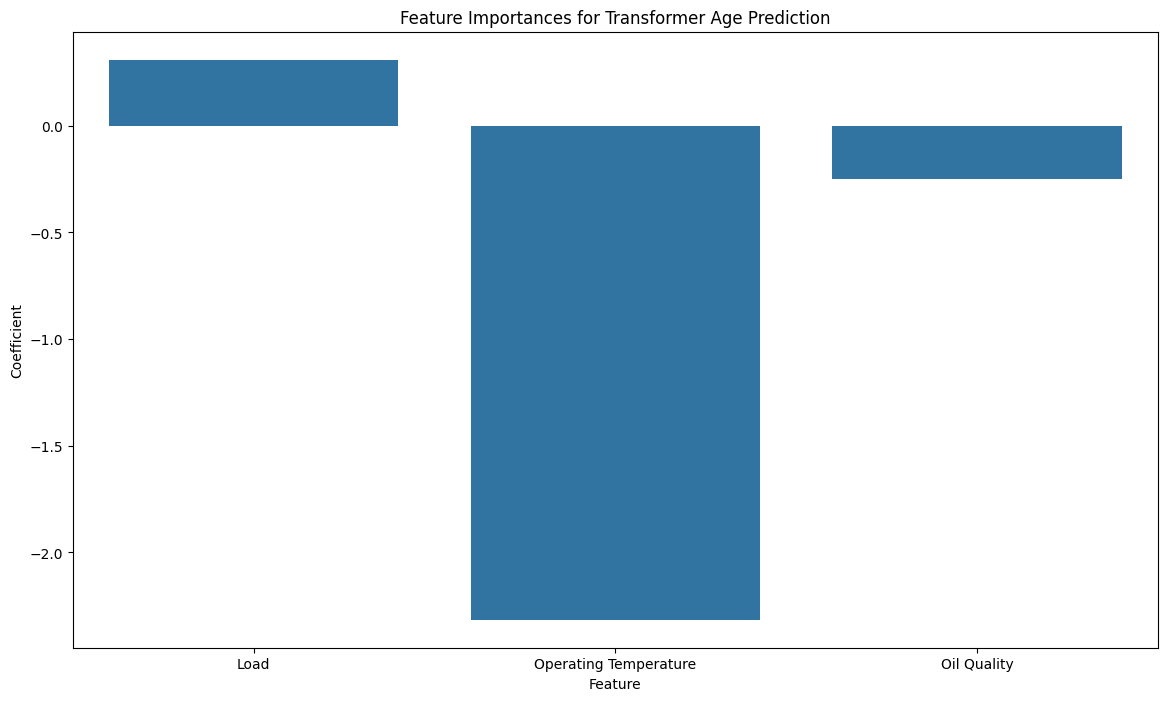

           Transformer Name  Actual Age  Predicted Age      Error
0           Trafo Bangetayu       30.42      17.970533  12.449467
1           Trafo Plamongan       32.96      22.245602  10.714398
2   Trafo Banjirkanal Timur       28.86      18.691520  10.168480
3         Trafo Mangunharjo       23.90      17.850460   6.049540
4          Trafo Pedurungan       31.73      17.599278  14.130722
5          Trafo Jatingaleh       15.76      18.706476  -2.946476
6            Trafo Kaligawe        9.68      15.023521  -5.343521
7      Trafo Semarang Timur       11.34      15.110798  -3.770798
8      Trafo Semarang Barat       39.25      16.400698  22.849302
9               Trafo Genuk       21.54      21.034507   0.505493
10         Trafo Banyumanik        7.29      16.494139  -9.204139
11          Trafo Karangayu        5.89      14.083296  -8.193296
12          Trafo Tembalang        8.59      21.215133 -12.625133
13         Trafo Jatingaleh       34.18      21.595393  12.584607
14        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = {
    'Transformer Name': ['Trafo Bangetayu', 'Trafo Plamongan', 'Trafo Banjirkanal Timur', 'Trafo Mangunharjo', 'Trafo Pedurungan',
                         'Trafo Jatingaleh', 'Trafo Kaligawe', 'Trafo Semarang Timur', 'Trafo Semarang Barat', 'Trafo Genuk',
                         'Trafo Banyumanik', 'Trafo Karangayu', 'Trafo Tembalang', 'Trafo Jatingaleh', 'Trafo Tugu', 'Trafo Srondol',
                         'Trafo Mijen', 'Trafo Semarang Barat', 'Trafo Jatingaleh', 'Trafo Tegalsari', 'Trafo Mijen', 'Trafo Karangayu',
                         'Trafo Johar', 'Trafo Kota Lama', 'Trafo Tanah Mas'],
    'Load': [52.77, 93.30, 67.39, 82.79, 84.99, 76.27, 57.96, 93.85, 91.31, 74.38, 84.98, 52.01, 87.53, 71.60, 68.50, 58.25,
             54.63, 77.85, 71.96, 76.61, 86.20, 95.37, 81.97, 59.76, 59.88],
    'Operating Temperature': [62.60, 51.42, 62.75, 64.69, 67.52, 63.28, 74.48, 78.00, 71.72, 52.39, 72.38, 77.71, 52.41,
                              50.14, 72.70, 58.97, 64.02, 51.07, 59.99, 74.07, 59.28, 63.57, 54.30, 67.26, 68.73],
    'Oil Quality': [0.73, 0.64, 0.53, 0.95, 0.70, 0.58, 0.68, 0.66, 0.84, 0.88, 0.59, 0.63, 0.98, 0.86, 0.92, 0.90, 0.69,
                    0.71, 0.84, 1.00, 0.73, 0.80, 0.79, 0.96, 0.94],
    'Transformer Age': [30.42, 32.96, 28.86, 23.90, 31.73, 15.76, 9.68, 11.34, 39.25, 21.54, 7.29, 5.89, 8.59, 34.18, 15.05,
                        8.63, 34.36, 18.29, 7.54, 34.58, 16.22, 5.47, 24.99, 22.86, 14.59]
}

df = pd.DataFrame(data)

# Features and target
features = ['Load', 'Operating Temperature', 'Oil Quality']
target = 'Transformer Age'

# Splitting the data
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}, Train R2: {train_r2:.2f}')
print(f'Test MSE: {test_mse:.2f}, Test R2: {test_r2:.2f}')

# Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

print(coefficients)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age of Transformers')
plt.legend()
plt.show()

# Plot feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title('Feature Importances for Transformer Age Prediction')
plt.show()

# Save the results to a CSV file
results = pd.DataFrame({
    'Transformer Name': df['Transformer Name'],
    'Actual Age': y,
    'Predicted Age': model.predict(scaler.transform(X))
})
results['Error'] = results['Actual Age'] - results['Predicted Age']

results.to_csv('Transformer_Age_Predictions.csv', index=False)
print(results)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Data transformers
data = {
    'Transformer Name': ['Trafo Bangetayu', 'Trafo Plamongan', 'Trafo Banjirkanal Timur', 'Trafo Mangunharjo', 'Trafo Pedurungan',
                         'Trafo Jatingaleh', 'Trafo Kaligawe', 'Trafo Semarang Timur', 'Trafo Semarang Barat', 'Trafo Genuk',
                         'Trafo Banyumanik', 'Trafo Karangayu', 'Trafo Tembalang', 'Trafo Jatingaleh', 'Trafo Tugu',
                         'Trafo Srondol', 'Trafo Mijen', 'Trafo Semarang Barat', 'Trafo Jatingaleh', 'Trafo Tegalsari',
                         'Trafo Mijen', 'Trafo Karangayu', 'Trafo Johar', 'Trafo Kota Lama', 'Trafo Tanah Mas'],
    'Actual Age': [30, 32, 28, 23, 31, 15, 9, 11, 31, 21, 7, 5, 8, 31, 15, 8, 34, 18, 7, 34, 16, 5, 24, 22, 14],
    'Predicted Age': [16.025152, 22.70777, 19.720196, 22.964357, 13.587724, 20.703405, 17.126719, 19.095446, 22.41467, 21.462284,
                      17.802687, 17.921263, 16.519436, 17.007332, 21.729675, 21.427156, 17.057032, 13.552197, 18.819029, 22.106451,
                      18.16561, 21.991707, 28.651005, 22.213495, 19.236898]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat fitur dan target
X = df[['Predicted Age']]
y = df['Actual Age']

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Melakukan prediksi
df['Predicted Actual Age'] = model.predict(X)

# Menampilkan hasil
print(df[['Transformer Name', 'Actual Age', 'Predicted Age', 'Predicted Actual Age']])


           Transformer Name  Actual Age  Predicted Age  Predicted Actual Age
0           Trafo Bangetayu          30      16.025152             18.283076
1           Trafo Plamongan          32      22.707770             19.922189
2   Trafo Banjirkanal Timur          28      19.720196             19.189396
3         Trafo Mangunharjo          23      22.964357             19.985124
4          Trafo Pedurungan          31      13.587724             17.685224
5          Trafo Jatingaleh          15      20.703405             19.430558
6            Trafo Kaligawe           9      17.126719             18.553268
7      Trafo Semarang Timur          11      19.095446             19.036158
8      Trafo Semarang Barat          31      22.414670             19.850297
9               Trafo Genuk          21      21.462284             19.616696
10         Trafo Banyumanik           7      17.802687             18.719070
11          Trafo Karangayu           5      17.921263             18.748154

Random Forest Train MSE: 13.65
Random Forest Train R2: 0.81
Random Forest Test MSE: 199.31
Random Forest Test R2: -1.06
                 Feature  Importance
2            Oil Quality    0.289139
6       Insulation Level    0.182998
4               Humidity    0.163151
1  Operating Temperature    0.139062
3    Ambient Temperature    0.075578
0                   Load    0.073262
7         Load Harmonics    0.053514
5      Cooling Condition    0.023296


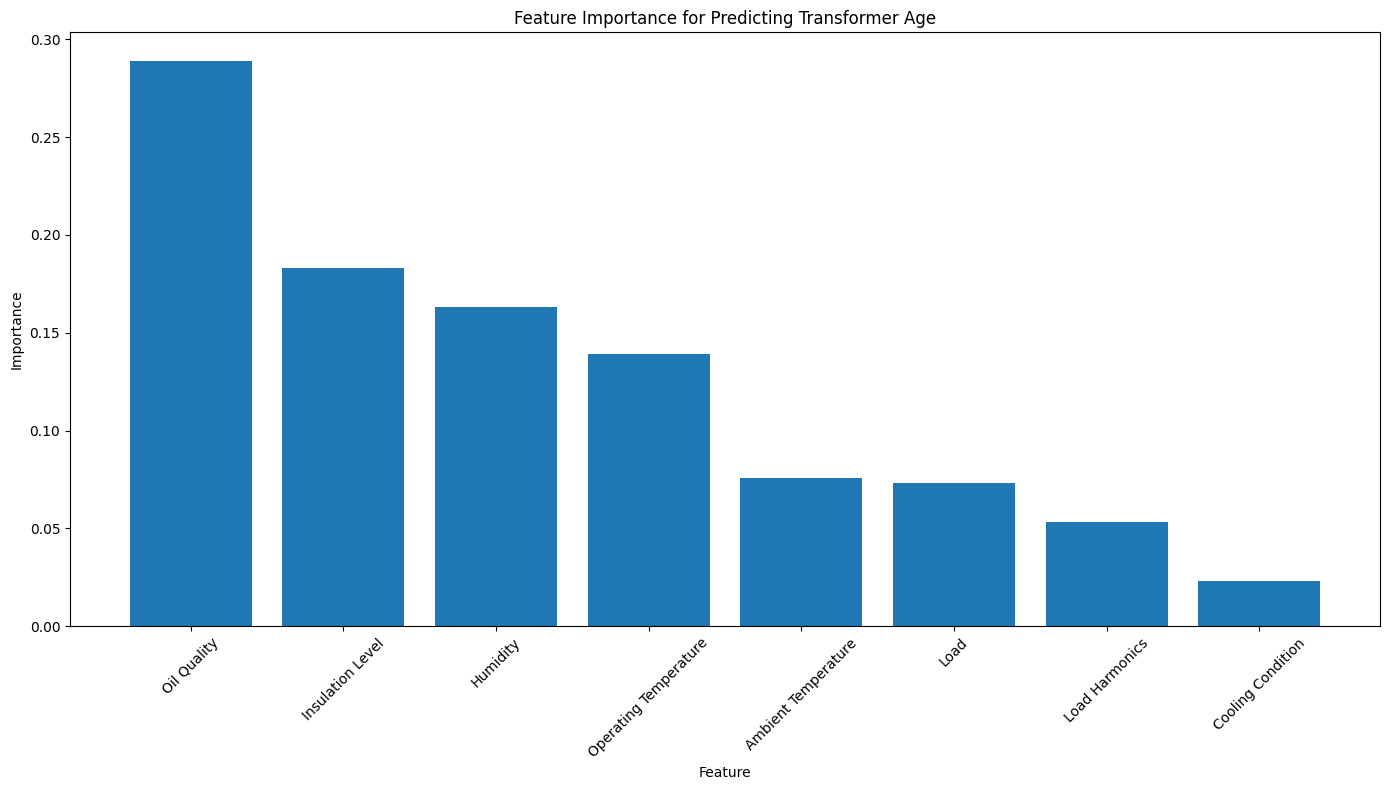

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data dengan sembilan parameter
data = {
    'Transformer Name': [
        'Trafo Bangetayu', 'Trafo Plamongan', 'Trafo Banjirkanal Timur', 'Trafo Mangunharjo', 'Trafo Pedurungan',
        'Trafo Jatingaleh', 'Trafo Kaligawe', 'Trafo Semarang Timur', 'Trafo Semarang Barat', 'Trafo Genuk',
        'Trafo Banyumanik', 'Trafo Karangayu', 'Trafo Tembalang', 'Trafo Jatingaleh', 'Trafo Tugu', 'Trafo Srondol',
        'Trafo Mijen', 'Trafo Semarang Barat', 'Trafo Jatingaleh', 'Trafo Tegalsari', 'Trafo Mijen', 'Trafo Karangayu',
        'Trafo Johar', 'Trafo Kota Lama', 'Trafo Tanah Mas'
    ],
    'Load': [
        45.00, 85.00, 70.00, 80.00, 95.00, 77.00, 60.00, 90.00, 88.00, 75.00,
        82.00, 56.00, 90.00, 74.00, 68.00, 59.00, 55.00, 79.00, 73.00, 76.00,
        87.00, 95.00, 84.00, 60.00, 62.00
    ],
    'Operating Temperature': [
        61.00, 52.00, 63.00, 65.00, 68.00, 65.00, 72.00, 76.00, 72.00, 55.00,
        73.00, 75.00, 53.00, 51.00, 71.00, 59.00, 65.00, 53.00, 60.00, 58.00,
        65.00, 62.00, 57.00, 56.00, 67.00
    ],
    'Oil Quality': [
        0.76, 0.67, 0.55, 0.93, 0.72, 0.61, 0.71, 0.70, 0.85, 0.91,
        0.64, 0.66, 0.96, 0.89, 0.93, 0.91, 0.73, 0.71, 0.83, 0.98,
        0.76, 0.82, 0.78, 0.97, 0.96
    ],
    'Ambient Temperature': [
        27.0, 28.5, 29.0, 28.0, 30.0, 27.5, 26.0, 28.5, 29.5, 27.0,
        28.0, 27.5, 29.0, 28.0, 30.5, 26.5, 27.0, 28.5, 29.5, 27.5,
        28.0, 29.5, 28.0, 27.0, 26.5
    ],
    'Humidity': [
        75, 80, 70, 85, 90, 65, 60, 82, 77, 70,
        75, 68, 85, 72, 88, 63, 70, 79, 74, 82,
        71, 86, 80, 76, 78
    ],
    'Cooling Condition': [
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0
    ],
    'Insulation Level': [
        5.0, 4.5, 6.0, 4.0, 7.0, 6.5, 7.5, 5.5, 4.0, 6.0,
        7.0, 4.5, 5.0, 7.5, 6.0, 5.5, 4.0, 7.0, 6.5, 5.0,
        6.0, 5.5, 4.0, 6.5, 7.0
    ],
    'Load Harmonics': [
        0.5, 0.6, 0.4, 0.7, 0.8, 0.6, 0.7, 0.5, 0.4, 0.6,
        0.8, 0.5, 0.7, 0.6, 0.5, 0.4, 0.7, 0.8, 0.6, 0.5,
        0.4, 0.6, 0.5, 0.8, 0.7
    ],
    'Transformer Age': [
        31.00, 30.00, 29.00, 24.00, 32.00, 17.00, 11.00, 13.00, 41.00, 23.00,
        9.00, 6.00, 9.00, 33.00, 16.00, 10.00, 34.00, 20.00, 8.00, 35.00,
        17.00, 7.00, 26.00, 23.00, 16.00
    ]
}

df = pd.DataFrame(data)

# Pisahkan fitur dan target
X = df[['Load', 'Operating Temperature', 'Oil Quality', 'Ambient Temperature', 'Humidity', 'Cooling Condition', 'Insulation Level', 'Load Harmonics']]
y = df['Transformer Age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Random Forest Train MSE: {train_mse:.2f}')
print(f'Random Forest Train R2: {train_r2:.2f}')
print(f'Random Forest Test MSE: {test_mse:.2f}')
print(f'Random Forest Test R2: {test_r2:.2f}')

# Feature Importances
importances = rf_model.feature_importances_
features = ['Load', 'Operating Temperature', 'Oil Quality', 'Ambient Temperature', 'Humidity', 'Cooling Condition', 'Insulation Level', 'Load Harmonics']
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plotting Feature Importances
plt.figure(figsize=(14, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting Transformer Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R2: {np.mean(cv_scores)}')


Cross-Validation R2 Scores: [-1.51604164 -1.31884058 -2.91110406 -5.92364122 -0.46516164]
Mean Cross-Validation R2: -2.426957828308643


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

# Train with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_best = best_rf_model.predict(X_train_scaled)
y_test_pred_best = best_rf_model.predict(X_test_scaled)

# Evaluate the model
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f'Best Random Forest Train MSE: {train_mse_best:.2f}')
print(f'Best Random Forest Train R2: {train_r2_best:.2f}')
print(f'Best Random Forest Test MSE: {test_mse_best:.2f}')
print(f'Best Random Forest Test R2: {test_r2_best:.2f}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Train MSE: 39.24
Best Random Forest Train R2: 0.46
Best Random Forest Test MSE: 200.63
Best Random Forest Test R2: -1.07


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Feature selection
selector = SelectFromModel(best_rf_model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train model on selected features
best_rf_model.fit(X_train_selected, y_train)

# Predictions
y_train_pred_selected = best_rf_model.predict(X_train_selected)
y_test_pred_selected = best_rf_model.predict(X_test_selected)

# Evaluate the model
train_mse_selected = mean_squared_error(y_train, y_train_pred_selected)
test_mse_selected = mean_squared_error(y_test, y_test_pred_selected)
train_r2_selected = r2_score(y_train, y_train_pred_selected)
test_r2_selected = r2_score(y_test, y_test_pred_selected)

print(f'Selected Features Random Forest Train MSE: {train_mse_selected:.2f}')
print(f'Selected Features Random Forest Train R2: {train_r2_selected:.2f}')
print(f'Selected Features Random Forest Test MSE: {test_mse_selected:.2f}')
print(f'Selected Features Random Forest Test R2: {test_r2_selected:.2f}')


Selected Features Random Forest Train MSE: 36.23
Selected Features Random Forest Train R2: 0.50
Selected Features Random Forest Test MSE: 199.56
Selected Features Random Forest Test R2: -1.06
